# 1. Regresión


In [256]:
import numpy as np
np.set_printoptions(suppress = True) #no usar notacion exponencial.
import matplotlib.pyplot as plt
import pandas as pd

## Función Verdadera Oculta

Usaremos como función oculta un sinusoide.

In [257]:
# vamos a crear una funcion que genere datos representativos de una funcion matematica
# vamos a reproducir la funcion sin(2*pi*x) o sea '2 * np.pi * x'. 
def create_sinusoidal_data(spread = 0.25, data_size = 50):
    np.random.seed(0) # esta linea evita que los datos cambien cada vez que corremos los codigos
    x = np.linspace(0, 1 , data_size)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale = spread, size = x.shape)
    # la funcion generatriz de los datos sera una variacin de la funcion sin(), seno.
    # El segundo termino introudce un error en la funcion. la magnitud de ese error la definimos con el param spreed
    
    
    return x , y    

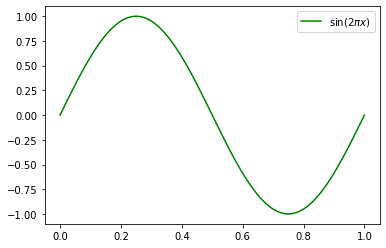

In [258]:
# creamos la funcion para visulizarla. Para crear la funcion vamos a setear spred = 0 para no introducir ningun error y
# poder ver la funcion tal cual es
x , f_x = create_sinusoidal_data(0, 100)

# graficamos los datos (LA FUNCION)
plt.plot(x, f_x, color = 'green', label = '$\sin(2\pi x)$')
plt.legend()
plt.show()

## Muestra Ruidosa

Vamos a generar puntos uniformes en $x$, ruidosos en $y$.

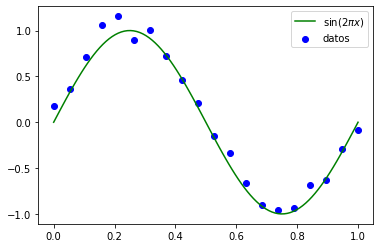

In [259]:
# creamos los puntos
data_size = 20
X , y = create_sinusoidal_data(spread = 0.10, data_size=data_size)

# graficamos los puntos
plt.scatter(x = X,
           y = y,
           color = 'blue',
           label = 'datos')

# tb graficamos la funcion que subyace a esos puntos (pero que en teoria NO CONOCEMOS)
plt.plot(x, f_x, color = 'green', label = '$\sin(2\pi x)$')

plt.legend()

plt.show()

In [260]:
X

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [261]:
y

array([ 0.17640523,  0.36471519,  0.71208651,  1.0612558 ,  1.15615606,
        0.89885671,  1.01078217,  0.72058819,  0.46562551,  0.20565444,
       -0.15019023, -0.33052004, -0.65962014, -0.90360583, -0.95219817,
       -0.93603283, -0.68775857, -0.63472854, -0.2933927 , -0.08540957])

In [262]:
# para visualizar los datos mas facilmente transformamos los array de Numpy en columnas de una DF de Pandas
df = pd.DataFrame({'x_values': X, 'y_values':y})
df

,x_values,y_values
0,0.000000,0.176405
1,0.052632,0.364715
2,0.105263,0.712087
3,0.157895,1.061256
4,0.210526,1.156156
5,0.263158,0.898857
6,0.315789,1.010782
7,0.368421,0.720588
8,0.421053,0.465626
9,0.473684,0.205654


## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
# vamos a seleccionar 5 datos para entrenamiento y dejar 15 datos para validacion
train_size = 5

validation_size = data_size - train_size

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=0)

In [265]:
X_train.shape, X_val.shape

((5,), (15,))

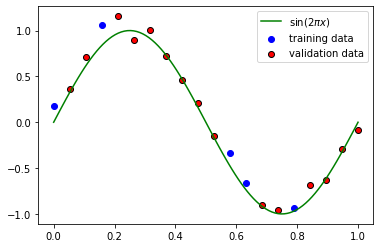

In [266]:
# graficamos los datos selecionados para entrenamiento y para validacion

# entrenamiento
plt.scatter(x = X_train,
           y = y_train,
           color = 'blue',
           label = 'training data')

# validacion
plt.scatter(x = X_val,
           y = y_val,
           color = 'red',
            edgecolor="k",
           label = 'validation data')

# graficamos la funcion que subyace a los puntos de los datos
plt.plot(x, f_x, color = 'green', label = '$\sin(2\pi x)$')

plt.legend()
plt.show()

## Regresión Lineal

Probaremos ajustar los puntos usando una recta.

Vamos a programar a mano el aprendizaje y la predicción.

### Solución de Cuadrados Mínimos

Datos de entrenamiento:
- $X \in R^{N \times K}:$ $N$ vectores de entrada, de $K$ dimensiones cada uno.
- $y \in R^N:$ $N$ valores de salida.

Aprendizaje:

$$w^* = (X^\top X)^{-1} X^\top y$$

Predicción:

$$f_{w^*}(x) = x^\top w^* = \sum_{k=1}^K x_k w^*_k$$

Con $K=1$ tendríamos:

$$f_{w^*}(x) = x_1 w_1^*$$

Para que sea una recta nos falta un $w_0$ ("bias").
Esto se puede resolver haciendo $K=2$ y agregando un valor constante 1 a cada dato:

$$f_{w^*}((1, x)) = w_0 + x_1 w_1^*$$


In [267]:
X_train

array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895])

In [268]:
X_train.shape

(5,)

In [269]:
X_train_bias = np.stack((np.ones(X_train.shape[0]), X_train), axis = 1) # agrega un bias
X_train_bias

array([[1.        , 0.57894737],
       [1.        , 0.15789474],
       [1.        , 0.        ],
       [1.        , 0.78947368],
       [1.        , 0.63157895]])

In [270]:
X_train_bias.shape

(5, 2)

In [271]:
def linear_least_squares(X, y):
    # dados los datos de (x, y) esta funcion devuelve los parametros w0 y w1 (pendiente y ordenada al origen)
    # de la ecuacion lineal que mejor representa el grupo de datos.
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)
    
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))


def f(X, w):
    # esta funcion toma datos en X y los parametros W y devuelve los valores predicho de Y o sea f(x)
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)
    
    return X_b.dot(w)

### Entrenar

In [272]:
X_train, y_train

(array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895]),
 array([-0.33052004,  1.0612558 ,  0.17640523, -0.93603283, -0.65962014]))

In [273]:
w = linear_least_squares(X_train, y_train)

In [274]:
w

array([-1.95626346,  0.70657973])

In [275]:
print(f'W0 = {w[0]}')
print(f'W1 = {w[1]}')

W0 = -1.9562634563137524
W1 = 0.7065797270668643


### Graficar

Graficaremos la función aprendida a partir de los datos de entrenamiento. También graficaremos con los datos de evaluación y la función oculta, para comparar.

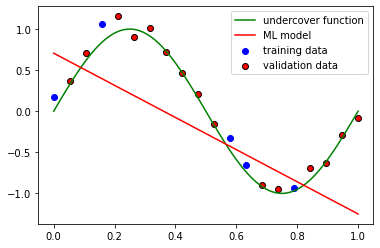

In [276]:
# graficamos los datos de entrenamiento
plt.scatter(x = X_train,
           y = y_train,
           color = 'blue',
           label = 'training data')

# graficamos la funcion que subyace  a los puntos (inaccesible para nosotros como data scientists)
plt.plot(x, f_x, color = 'green', label = 'undercover function')

# graficamos los puntos de validacion (que hasta el momento no usamos)
plt.scatter(x = X_val,
           y = y_val,
           color = 'red',
           edgecolor = 'k',
           label = 'validation data')

# graficamos el modelo aprendido (la funcion lineal)
plt.plot(x, f(x,w),
        color = 'red',
        label = 'ML model',
        )


plt.legend()
plt.show()

### Predecir y Evaluar: Error Cuadrático Medio

Obtendremos los valores predichos para los datos de entrenamiento y de evaluación.
Calcularemos el error cuadrático medio sobre ambos conjuntos de datos.

In [277]:
y_train_pred = f(X_train, w)
y_val_pred = f(X_val, w)

In [278]:
y_train_pred

array([-0.42599385,  0.39769602,  0.70657973, -0.83783879, -0.52895509])

In [279]:
y_val_pred

array([-1.14672249,  0.60361849, -1.24968373, -0.11711015, -0.32303262,
       -1.04376126,  0.08881232, -0.63191632,  0.29473479,  0.50065726,
        0.19177355, -0.73487756, -0.22007138, -0.01414891, -0.94080003])

Usamos la función [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) de scikit-learn:

In [280]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)

print(f'Trainning error: {train_error:f}')
print(f'Validation error: {val_error:f}')

Trainning error: 0.151445
Validation error: 0.381363


Resultado: vemos que el error asociado a las predicciones del grupo de validacion es sensiblemente mayor que el error asociado a las predicciones en el grupo de entrenamiento. Este resultado sugiere que el ajuste lineal (calculado por el metodo de regresion lineal por cuadrados minimos) no seria un buen modelo.

## Regresión Polinomial

Ahora haremos regresión polinomial. En este caso usaremos scikit-learn para definir el modelo, entrenar y predecir.

En scikit-learn cada dato de entrada debe ser un vector, no un número (escalar). Debemos convertir cada dato en un vector de una dimensión:

In [281]:
X_train.shape, X_val.shape

((5,), (15,))

In [282]:
X_train

array([0.57894737, 0.15789474, 0.        , 0.78947368, 0.63157895])

In [283]:
X_val

array([0.94736842, 0.05263158, 1.        , 0.42105263, 0.52631579,
       0.89473684, 0.31578947, 0.68421053, 0.21052632, 0.10526316,
       0.26315789, 0.73684211, 0.47368421, 0.36842105, 0.84210526])

In [284]:
# con este bloque convertimos los datos de entrenamiento y validacion en vectores de n X 1
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)

X_train.shape, X_val.shape

((5, 1), (15, 1))

In [285]:
X_train

array([[0.57894737],
       [0.15789474],
       [0.        ],
       [0.78947368],
       [0.63157895]])

In [286]:
X_val

array([[0.94736842],
       [0.05263158],
       [1.        ],
       [0.42105263],
       [0.52631579],
       [0.89473684],
       [0.31578947],
       [0.68421053],
       [0.21052632],
       [0.10526316],
       [0.26315789],
       [0.73684211],
       [0.47368421],
       [0.36842105],
       [0.84210526]])

### Features Polinomiales

En scikit-learn, la regresión polinomial se implementa como un modelo de dos pasos.

El primer paso genera vectores de características polinomiales, y el segundo paso aplica una regresión lineal sobre estos vectores (ver [Polynomial interpolation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)).

Por ejemplo, para generar características polinomiales de grado 5:

In [287]:
# recordar que esto es solo un ejemplo de como generar un polinomio de grado 5.
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(5) # polinomio de grado 5

pf.fit(X_train)

PolynomialFeatures(degree=5)

In [288]:
X_train.shape

(5, 1)

In [289]:
X_train2 = pf.transform(X_train)

In [290]:
X_train2.shape

(5, 6)

In [291]:
X_train[0]

array([0.57894737])

In [292]:
# cada uno de los valores de la matriz (array) corresponde al valor de x elevado a la potencia correspondiente a ese termino
X_train2[0]

array([1.        , 0.57894737, 0.33518006, 0.19405161, 0.11234567,
       0.06504223])

### Instanciar y Entrenar

Crearemos y entrenaremos un modelo de grado 2.

Como siempre en scikit-learn, para entrenar usamos la función **fit**.

In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [294]:
# con estas lienas definimos el grado del polinomio que vamos a usar para ajustar los datos de estrenamiento
degree = 2 
pf = PolynomialFeatures(2)

In [295]:
lr = LinearRegression(fit_intercept=False)

In [296]:
model = make_pipeline(pf, lr)

In [297]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [298]:
# equivalente a:
Z_train = pf.fit_transform(X_train, y_train)
lr.fit(Z_train, y_train)

LinearRegression(fit_intercept=False)

### Inspeccionar Parámetros

Ver [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [299]:
lr.coef_

array([ 0.45340784,  1.62753594, -4.67896686])

In [300]:
lr.intercept_

0.0

### Graficar Resultado

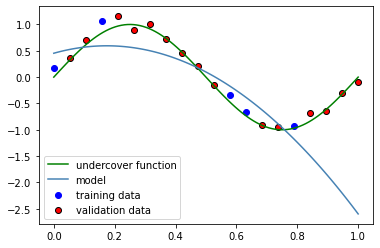

In [301]:
# graficamos los puntos de entrenamiento
plt.scatter(x = X_train,
           y = y_train,
           color = 'blue',
           label = 'training data')

# graficamos los datos de validacion
plt.scatter(x = X_val,
           y = y_val,
           color = 'red',
            edgecolor = 'k',
           label = 'validation data')

# graficamos la funcion que subyace a los puntos (inaccesible para el analista de datos)
plt.plot(x, f_x, color = 'green', label = 'undercover function')

# graficamos el modelo predicho a partir del polinomio de grado 2.
plt.plot(x, model.predict(x.reshape(-1,1)), color = 'steelblue', label = 'model')


plt.legend(loc = 'lower left')
plt.show()

### Predecir y Evaluar

Para predecir, usamos la función **predict**:

In [302]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [303]:
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)

In [304]:
print(f'Train Error: {train_error:0.2}')
print(f'Test Error: {val_error:0.2}')

Train Error: 0.091
Test Error: 0.87


## Sobreajuste vs. Generalización

Probaremos polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación:

In [305]:
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


for degree in degrees:
    #train
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)
    
    #predict
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
        
    #evaluate
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    
    train_errors.append(train_error)
    val_errors.append(val_error)

In [306]:
train_errors, val_errors

([0.49661452325600575,
  0.1514454482029292,
  0.0908261073936378,
  0.0008955085900105252,
  9.165577642536631e-30,
  7.820816318167688e-31,
  3.4095122991476115e-30,
  6.977875300108281e-30,
  5.789884673212459e-29,
  3.573128522015062e-28],
 [0.5391603515420854,
  0.3813628247100447,
  0.8685511508922742,
  0.01766716877562933,
  0.7619704304229206,
  0.9951653957825081,
  1.1957007653548009,
  1.3341086088246277,
  1.3926020261709433,
  1.367583425693985])

Graficaremos las curvas de error en términos del grado del polinomio.

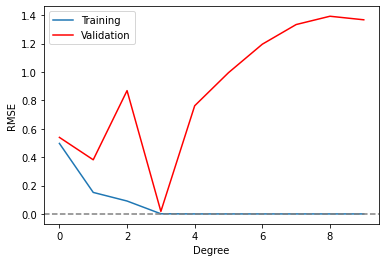

In [307]:
# graficamos la curva para los datos de entrenamiento
plt.plot(degrees, train_errors, label = 'Training')

#graficamos la curva para los datos de evaluacion
plt.plot(degrees, val_errors, label = 'Validation', color  = 'red')

plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.axhline(0, color = 'grey', linestyle = 'dashed')

plt.legend()
plt.show()

Estte resultado muestra que mientras el error RMSE para el grupo de entrenamiento disminuye a medida que aumenta el grado del polinomio, no sucede lo mismo con el grupo de evaluacion. Esto sugiere que estamos frente a un efecto de sobre ajuste.\
Dados estos resultados el mejor modelo seria el polinomio de grado 3.

### Mejor Modelo

De acuerdo a la gráfica anterior, y como era de esperarse, el modelo que mejor ajusta los datos es el de grado 3:

In [308]:
degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [309]:
lr.coef_

array([  0.17374917,  10.08806898, -31.41746612,  21.33946075])

In [310]:
lr.intercept_

0.0

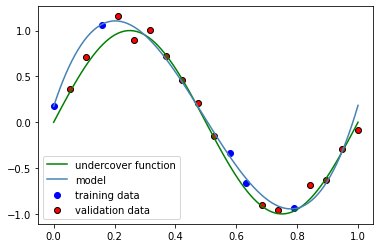

In [311]:
# graficamos los puntos de entrenamiento
plt.scatter(x = X_train,
           y = y_train,
           color = 'blue',
           label = 'training data')

# graficamos los datos de validacion
plt.scatter(x = X_val,
           y = y_val,
           color = 'red',
            edgecolor = 'k',
           label = 'validation data')

# graficamos la funcion que subyace a los puntos (inaccesible para el analista de datos)
plt.plot(x, f_x, color = 'green', label = 'undercover function')

# graficamos el modelo predicho a partir del polinomio de grado 2.
plt.plot(x, model.predict(x.reshape(-1,1)), color = 'steelblue', label = 'model')


plt.legend(loc = 'lower left')
plt.show()

In [312]:
train_errors[3], val_errors[3]

(0.0008955085900105252, 0.01766716877562933)

### Modelo Sobreajustado

Veamos cómo es la gráfica de uno de los modelos que sufre de sobreajuste:

In [313]:
degree = 8
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=0)
model = make_pipeline(pf, lr)
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('linearregression', LinearRegression(fit_intercept=0))])

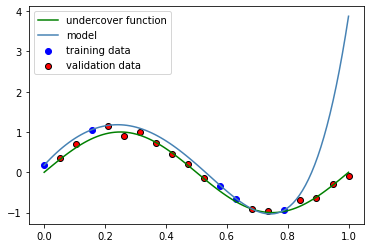

In [315]:
# graficamos los puntos de entrenamiento
plt.scatter(x = X_train,
           y = y_train,
           color = 'blue',
           label = 'training data')

# graficamos los datos de validacion
plt.scatter(x = X_val,
           y = y_val,
           color = 'red',
            edgecolor = 'k',
           label = 'validation data')

# graficamos la funcion que subyace a los puntos (inaccesible para el analista de datos)
plt.plot(x, f_x, color = 'green', label = 'undercover function')

# graficamos el modelo predicho a partir del polinomio de grado 2.
plt.plot(x, model.predict(x.reshape(-1,1)), color = 'steelblue', label = 'model')


plt.legend(loc = 'upper left')
plt.show()